In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ls

gdrive/  sample_data/


In [ ]:
cd /content/gdrive/My Drive/ZFDataset/

/content/gdrive/My Drive/ZFDataset


In [ ]:
import os
import sys
import tempfile
import pathlib
from io import BytesIO
import base64
import pandas as pd

import numpy as np
from PIL import Image, ImageOps

from matplotlib import cm

from scipy import ndimage as ndi
from skimage import io, filters, measure, morphology, img_as_ubyte
import pandas as pd
from sklearn import decomposition, manifold

In [ ]:
# syllable_df_Nest_Total = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest1_Densenet121.pkl')
# syllable_df_Nest_Total1 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest4_Densenet121.pkl')
# syllable_df_Nest_Total2 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest5_Densenet121.pkl')

In [ ]:
# syllable_df_Nest_Total1 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest1_Densenet121.pkl')
# syllable_df_Nest_Total1['Nest'] = "Nest1"
syllable_df_Nest_Total2 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest2_Densenet121.pkl')
syllable_df_Nest_Total2['Nest'] = "Nest2"
syllable_df_Nest_Total3 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest3_Densenet121.pkl')
syllable_df_Nest_Total3['Nest'] = "Nest3"
syllable_df_Nest_Total4 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest4_Densenet121.pkl')
syllable_df_Nest_Total4['Nest'] = "Nest4"
syllable_df_Nest_Total5 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest5_Densenet121.pkl')
syllable_df_Nest_Total5['Nest'] = "Nest5"
syllable_df_Nest_Total6 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest6_Densenet121.pkl')
syllable_df_Nest_Total6['Nest'] = "Nest6"
syllable_df_Nest_Total7 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest7_Densenet121.pkl')
syllable_df_Nest_Total7['Nest'] = "Nest7"
syllable_df_Nest_Total8 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest8_Densenet121.pkl')
syllable_df_Nest_Total8['Nest'] = "Nest8"
syllable_df_Nest_Total9 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest9_Densenet121.pkl')
syllable_df_Nest_Total9['Nest'] = "Nest9"
syllable_df_Nest_Total10 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest10_Densenet121.pkl')
syllable_df_Nest_Total10['Nest'] = "Nest10"
syllable_df_Nest_Total11 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest11_Densenet121.pkl')
syllable_df_Nest_Total11['Nest'] = "Nest11"

In [ ]:
syllable_df_Nest_Total = pd.concat([syllable_df_Nest_Total2, syllable_df_Nest_Total3, syllable_df_Nest_Total4, syllable_df_Nest_Total5,
                                    syllable_df_Nest_Total6, syllable_df_Nest_Total7, syllable_df_Nest_Total8, syllable_df_Nest_Total9, syllable_df_Nest_Total10, syllable_df_Nest_Total11], ignore_index=True)
del syllable_df_Nest_Total11, syllable_df_Nest_Total2, syllable_df_Nest_Total3, syllable_df_Nest_Total4, syllable_df_Nest_Total5
del syllable_df_Nest_Total6, syllable_df_Nest_Total7, syllable_df_Nest_Total8, syllable_df_Nest_Total9, syllable_df_Nest_Total10

In [ ]:
syllable_df_Nest_Total.drop(columns=['audio', 'spectrogram'], inplace=True)

In [ ]:
syllable_df_Nest_Total

,start_time,end_time,labels,indv,indvi,key,rate,labels_indv,densenet121_features,Nest
0,0.050414,0.097987,i,cxyc,1,cxyc_0000,44100,cxyc_i,"[0.00028999924, 0.0064279474, 0.0022861622, 0....",Nest2
1,0.508713,0.570935,i,cxyc,2,cxyc_0000,44100,cxyc_i,"[0.0002864063, 0.0052835844, 0.002387906, 0.00...",Nest2
2,0.644405,0.703089,i,cxyc,3,cxyc_0000,44100,cxyc_i,"[0.0002815476, 0.0063230395, 0.002232295, 0.00...",Nest2
3,0.810504,0.870799,i,cxyc,4,cxyc_0000,44100,cxyc_i,"[0.00028404495, 0.004314999, 0.0023957393, 0.0...",Nest2
4,0.938940,1.000845,i,cxyc,5,cxyc_0000,44100,cxyc_i,"[0.00026726056, 0.0051532886, 0.0022074692, 0....",Nest2
...,...,...,...,...,...,...,...,...,...,...
23050,2.372736,2.450990,f,vstd,16,vstd_0004,44100,vstd_f,"[0.00024792607, 0.005248108, 0.0019565802, 0.0...",Nest11
23051,2.598813,2.651443,0,vstd,17,vstd_0004,44100,vstd_0,"[0.00027455005, 0.0042480123, 0.0022447598, 0....",Nest11
23052,3.907656,3.982781,0,vstd,18,vstd_0004,44100,vstd_0,"[0.0002736851, 0.0052517042, 0.001988696, 0.00...",Nest11
23053,4.090015,4.216341,0,vstd,19,vstd_0004,44100,vstd_0,"[0.00030207614, 0.0031468559, 0.0016397715, 0....",Nest11


In [ ]:
Tutor_dataset = syllable_df_Nest_Total[syllable_df_Nest_Total['indv'].isin(["ivoj", "nzen", "xsup", "gthh", "ttog", "isab", "ixea", "ihza", "zegf", "sjew", "cgby"])].reset_index(drop=True)

In [ ]:
Pupil_dataset = syllable_df_Nest_Total[syllable_df_Nest_Total['indv'].isin(["hphi", "cyea", "phpd", "cxyc", "qfod", "nsrn", "khxv", "oogw", "kcos", "tbfk", "kccr", "bbyj", "onsu", "vusu", "kfgj", "inji", "hsew", "sdhp", "vstd"])].reset_index(drop=True)

In [ ]:
Tutor_dataset

,start_time,end_time,labels,indv,indvi,key,rate,labels_indv,densenet121_features,Nest
0,0.141369,0.163840,i,nzen,1,nzen_0000,44100,nzen_i,"[0.000281047, 0.006896307, 0.0021862306, 0.003...",Nest2
1,0.226426,0.290575,i,nzen,2,nzen_0000,44100,nzen_i,"[0.0003058371, 0.005542181, 0.0023643032, 0.00...",Nest2
2,0.388081,0.453342,i,nzen,3,nzen_0000,44100,nzen_i,"[0.0002870175, 0.0060381475, 0.0023333135, 0.0...",Nest2
3,0.487174,0.550757,j,nzen,4,nzen_0000,44100,nzen_j,"[0.0003228713, 0.0052634007, 0.0023634112, 0.0...",Nest2
4,0.579305,0.642185,a,nzen,5,nzen_0000,44100,nzen_a,"[0.00028934886, 0.0054234248, 0.00228799, 0.00...",Nest2
...,...,...,...,...,...,...,...,...,...,...
7176,10.182711,10.273732,0,cgby,39,cgby_0032,44100,cgby_0,"[0.0003101198, 0.0023758058, 0.00217167, 0.003...",Nest11
7177,10.322530,10.421079,0,cgby,40,cgby_0032,44100,cgby_0,"[0.00037552853, 0.004450283, 0.0019465615, 0.0...",Nest11
7178,10.451782,10.581827,0,cgby,41,cgby_0032,44100,cgby_0,"[0.00045851385, 0.0021333802, 0.0020485146, 0....",Nest11
7179,10.640036,10.822507,0,cgby,42,cgby_0032,44100,cgby_0,"[0.00029902745, 0.0032967748, 0.0025172085, 0....",Nest11


In [ ]:
Pupil_dataset

,start_time,end_time,labels,indv,indvi,key,rate,labels_indv,densenet121_features,Nest
0,0.050414,0.097987,i,cxyc,1,cxyc_0000,44100,cxyc_i,"[0.00028999924, 0.0064279474, 0.0022861622, 0....",Nest2
1,0.508713,0.570935,i,cxyc,2,cxyc_0000,44100,cxyc_i,"[0.0002864063, 0.0052835844, 0.002387906, 0.00...",Nest2
2,0.644405,0.703089,i,cxyc,3,cxyc_0000,44100,cxyc_i,"[0.0002815476, 0.0063230395, 0.002232295, 0.00...",Nest2
3,0.810504,0.870799,i,cxyc,4,cxyc_0000,44100,cxyc_i,"[0.00028404495, 0.004314999, 0.0023957393, 0.0...",Nest2
4,0.938940,1.000845,i,cxyc,5,cxyc_0000,44100,cxyc_i,"[0.00026726056, 0.0051532886, 0.0022074692, 0....",Nest2
...,...,...,...,...,...,...,...,...,...,...
15869,2.372736,2.450990,f,vstd,16,vstd_0004,44100,vstd_f,"[0.00024792607, 0.005248108, 0.0019565802, 0.0...",Nest11
15870,2.598813,2.651443,0,vstd,17,vstd_0004,44100,vstd_0,"[0.00027455005, 0.0042480123, 0.0022447598, 0....",Nest11
15871,3.907656,3.982781,0,vstd,18,vstd_0004,44100,vstd_0,"[0.0002736851, 0.0052517042, 0.001988696, 0.00...",Nest11
15872,4.090015,4.216341,0,vstd,19,vstd_0004,44100,vstd_0,"[0.00030207614, 0.0031468559, 0.0016397715, 0....",Nest11


In [ ]:
import torch
import torch.nn as nn
import re
import spacy
from collections import Counter
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import string
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import column_or_1d
from sklearn.model_selection import KFold
from datetime import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
def data_splitting_based_on_sample_size(syllable_df_Nest_Total):
  Label_Total = []
  Nest_Total = []

  for key in syllable_df_Nest_Total.key.unique():
    Label_Total.append(syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==key]['indv'].values[0])
    Nest_Total.append(syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==key]['Nest'].values[0])

  le = LabelEncoder()
  le.fit(Nest_Total)

  targets = le.transform(Nest_Total)

  encoded_targets = pd.DataFrame({'targets' : targets,
        'indvi' : Label_Total,
        'key' : syllable_df_Nest_Total.key.unique(),
        'Nest' : Nest_Total})

  # train_indices, test_indices = train_test_split(np.arange(targets.shape[0]), train_size=train_test_split_ratio, stratify=targets)

  # train_keys = encoded_targets.loc[train_indices]['key'].to_list()

  # test_keys = encoded_targets.loc[test_indices]['key'].to_list()

  return encoded_targets, le

In [ ]:
encoded_targets, le = data_splitting_based_on_sample_size(Tutor_dataset)

In [ ]:
encoded_targets

,targets,indvi,key,Nest
0,2,nzen,nzen_0000,Nest2
1,2,nzen,nzen_0001,Nest2
2,2,nzen,nzen_0002,Nest2
3,2,nzen,nzen_0003,Nest2
4,2,nzen,nzen_0004,Nest2
...,...,...,...,...
320,1,cgby,cgby_0026,Nest11
321,1,cgby,cgby_0048,Nest11
322,1,cgby,cgby_0022,Nest11
323,1,cgby,cgby_0012,Nest11


In [ ]:
encoded_targets = encoded_targets.sample(frac=1, random_state=2021).reset_index(drop=True)

In [ ]:
encoded_targets

,targets,indvi,key,Nest
0,7,ixea,ixea_0001,Nest7
1,6,isab,isab_0028,Nest6
2,4,gthh,gthh_0030,Nest4
3,6,isab,isab_0004,Nest6
4,0,sjew,sjew_0007,Nest10
...,...,...,...,...
320,3,xsup,xsup_0027,Nest3
321,5,ttog,ttog_0023,Nest5
322,6,isab,isab_0006,Nest6
323,4,gthh,gthh_0033,Nest4


In [ ]:
# sequence_length = current_songfile['indvi'].values[-1]

In [ ]:
# for i in range(0, sequence_length):
#   print(torch.tensor(current_songfile['densenet121_features'].values[i]))

In [ ]:
# X_train = []; X_test =[];
# y_train = []; y_test =[];
X_total = []; y_total = [];

for key in encoded_targets['key'].unique():# [:10]:
    print(key)
    current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==key]
    sequence_length = current_songfile['indvi'].values[-1]
    for i in range(0, sequence_length):
      X_total.append(torch.tensor(current_songfile['densenet121_features'].values[i]))
      y_total.append(current_songfile['Nest'].values[i])
    # if key in train_keys:
    #   for i in range(0, sequence_length):
    #     X_train.append(torch.tensor(current_songfile['densenet121_features'].values[i]))
    #     y_train.append(current_songfile['indv'].values[i])
    # elif key in test_keys:
    #   for i in range(0, sequence_length):
    #     X_test.append(torch.tensor(current_songfile['densenet121_features'].values[i]))
    #     y_test.append(current_songfile['indv'].values[i])
    # else:
    #   print(key, "Not Found")

ixea_0001
isab_0028
gthh_0030
isab_0004
sjew_0007
ixea_0008
gthh_0024
ttog_0016
zegf_0000
cgby_0021
nzen_0001
ixea_0025
sjew_0000
cgby_0002
isab_0021
gthh_0010
nzen_0006
ixea_0018
gthh_0022
xsup_0019
xsup_0011
xsup_0029
ttog_0001
ttog_0032
isab_0020
ttog_0027
ihza_0021
cgby_0027
ttog_0033
cgby_0009
isab_0018
xsup_0031
sjew_0019
nzen_0009
nzen_0002
isab_0013
isab_0012
ttog_0030
ttog_0026
cgby_0033
isab_0011
ttog_0000
ihza_0006
ixea_0024
xsup_0005
cgby_0014
xsup_0024
nzen_0015
cgby_0031
cgby_0025
xsup_0025
ihza_0005
cgby_0007
ixea_0034
ixea_0002
xsup_0020
cgby_0019
zegf_0005
gthh_0007
zegf_0007
ttog_0010
nzen_0008
nzen_0014
cgby_0010
ihza_0017
gthh_0028
gthh_0032
gthh_0015
ttog_0005
isab_0008
ixea_0031
xsup_0009
ihza_0026
gthh_0013
sjew_0023
cgby_0046
ixea_0011
zegf_0015
isab_0003
ihza_0013
gthh_0002
ttog_0036
ixea_0014
zegf_0024
ixea_0000
gthh_0006
isab_0009
ttog_0011
nzen_0013
cgby_0012
ihza_0016
cgby_0015
ttog_0002
ixea_0028
isab_0019
gthh_0016
zegf_0006
gthh_0008
nzen_0003
isab_0017


In [ ]:
len(X_total)

7181

In [ ]:
targets = le.transform(y_total)

In [ ]:
targets

array([7, 7, 7, ..., 5, 5, 5])

In [ ]:
len(np.unique(targets))

10

In [ ]:
class LinearClassifier2layer(torch.nn.Module):
  def __init__(self, input_dim=1024, hidden_dim=512, output_dim=10):
    super(LinearClassifier2layer, self).__init__()
    self.linear1 = torch.nn.Linear(input_dim, hidden_dim, bias=True)
    self.linear2 = torch.nn.Linear(hidden_dim, output_dim, bias=True)

  def forward(self, x):
    x = F.relu(self.linear1(x))
    # x = F.relu(self.linear2(x))
    x = self.linear2(x)
    # x = self.linear1(x)
    return x

class LinearClassifier3layer(torch.nn.Module):
  def __init__(self, input_dim=1024, hidden_dim=512, output_dim=10):
    super(LinearClassifier3layer, self).__init__()
    # self.linear1 = torch.nn.Linear(input_dim, output_dim, bias=True)
    self.linear1 = torch.nn.Linear(input_dim, hidden_dim, bias=True)
    self.linear2 = torch.nn.Linear(hidden_dim, int(hidden_dim/2), bias=True)
    self.linear3 = torch.nn.Linear(int(hidden_dim/2), output_dim, bias=True)

  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    # x = self.linear1(x)
    return x

class LinearClassifier4layer(torch.nn.Module):
  def __init__(self, input_dim=1024, hidden_dim=512, output_dim=10):
    super(LinearClassifier4layer, self).__init__()
    # self.linear1 = torch.nn.Linear(input_dim, output_dim, bias=True)
    self.linear1 = torch.nn.Linear(input_dim, hidden_dim, bias=True)
    self.linear2 = torch.nn.Linear(hidden_dim, int(hidden_dim/2), bias=True)
    self.linear3 = torch.nn.Linear(int(hidden_dim/2), int(hidden_dim/4), bias=True)
    self.linear4 = torch.nn.Linear(int(hidden_dim/4), output_dim, bias=True)

  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = F.relu(self.linear3(x))
    x = self.linear4(x)
    # x = self.linear1(x)
    return x

In [ ]:
num_occurences = encoded_targets.groupby('Nest').nunique()

In [ ]:
num_occurences

,targets,indvi,key
Nest,,,
Nest10,1,1,26
Nest11,1,1,49
Nest2,1,1,17
Nest3,1,1,39
Nest4,1,1,33
Nest5,1,1,37
Nest6,1,1,28
Nest7,1,1,35
Nest8,1,1,29


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device ='cpu'

In [ ]:
class_weights = torch.tensor(num_occurences['key'].min()/num_occurences['key'].values, dtype=float).to(device)

In [ ]:
model = LinearClassifier2layer(hidden_dim=512, output_dim=len(le.classes_))
criterion = torch.nn.CrossEntropyLoss(weight=class_weights.float())
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
encoded_targets_test, le_test = data_splitting_based_on_sample_size(Pupil_dataset)
encoded_targets_test = encoded_targets_test.sample(frac=1, random_state=2021).reset_index(drop=True)

X_Total_Test = []
y_Total_Test = []

for key in encoded_targets_test['key'].unique():# [:10]:
    print(key)
    current_songfile = Pupil_dataset.loc[Pupil_dataset['key']==key]
    sequence_length = current_songfile['indvi'].values[-1]
    for i in range(0, sequence_length):
      X_Total_Test.append(torch.tensor(current_songfile['densenet121_features'].values[i]))
      y_Total_Test.append(current_songfile['Nest'].values[i])

targets_test = torch.as_tensor(le.transform(y_Total_Test), dtype=torch.long)

kfgj_0012
khxv_0046
onsu_0007
sdhp_0020
nsrn_0007
tbfk_0011
oogw_0000
khxv_0032
kccr_0047
kccr_0019
inji_0004
vstd_0024
vstd_0001
bbyj_0026
kfgj_0016
qfod_0011
cxyc_0013
cxyc_0024
kccr_0039
sdhp_0029
vusu_0001
tbfk_0004
tbfk_0016
khxv_0020
sdhp_0025
kfgj_0002
kccr_0033
vstd_0009
khxv_0025
khxv_0012
khxv_0024
kccr_0054
kcos_0015
sdhp_0015
khxv_0039
cxyc_0002
kcos_0029
inji_0003
onsu_0022
nsrn_0009
tbfk_0021
bbyj_0012
bbyj_0042
hsew_0000
khxv_0029
bbyj_0043
khxv_0004
bbyj_0017
kcos_0024
kccr_0026
kccr_0031
kccr_0009
nsrn_0001
nsrn_0005
sdhp_0013
khxv_0022
tbfk_0014
khxv_0002
nsrn_0019
hsew_0006
kfgj_0017
tbfk_0026
tbfk_0028
vusu_0026
kccr_0060
kccr_0025
qfod_0008
vstd_0010
bbyj_0019
kccr_0051
onsu_0016
kcos_0004
vstd_0008
bbyj_0016
bbyj_0001
tbfk_0009
cxyc_0009
oogw_0027
oogw_0005
kfgj_0029
nsrn_0010
tbfk_0031
oogw_0031
onsu_0014
kccr_0057
onsu_0018
kfgj_0015
oogw_0016
bbyj_0009
oogw_0023
khxv_0018
qfod_0013
bbyj_0025
cxyc_0001
bbyj_0000
khxv_0003
nsrn_0008
hsew_0001
oogw_0007
kccr_0024


In [ ]:
len(X_Total_Test)

14445

In [ ]:
class_weights

tensor([0.6538, 0.3469, 1.0000, 0.4359, 0.5152, 0.4595, 0.6071, 0.4857, 0.5862,
        0.5312], device='cuda:0', dtype=torch.float64)

In [ ]:
encoded_targets_test

,targets,indvi,key,Nest
0,8,kfgj,kfgj_0012,Nest8
1,3,khxv,khxv_0046,Nest3
2,7,onsu,onsu_0007,Nest7
3,1,sdhp,sdhp_0020,Nest11
4,2,nsrn,nsrn_0007,Nest2
...,...,...,...,...
519,2,nsrn,nsrn_0017,Nest2
520,3,khxv,khxv_0042,Nest3
521,2,nsrn,nsrn_0030,Nest2
522,6,kccr,kccr_0000,Nest6


In [ ]:
kf = KFold(n_splits  = 10)

In [ ]:
random_number_set = [
 3324,
 1778,
 329,
 5689,
 2746,
 8964,
 70,
 4786,
 2816,
 2405,
 2681,
 5769,
 9327,
 7867,
 4469,
 4928,
 5730,
 858,
 6775,
 5487,
 1464,
 7365,
 4313,
 9324,
 8958,
 7663,
 5362,
 299,
 4931,
 4906,
 5007,
 5848,
 5119,
 7172,
 6862,
 3981,
 8262,
 5441,
 4702,
 4177,
 2611,
 6342,
 9402,
 5609,
 3590,
 5397];

In [ ]:
epochs = 100; lr = 0.005;

df_loss_accuracy_crossval = pd.DataFrame(columns=['Train Loss', 'Train Accuracy', 'Val Loss', 'Val Accuracy', 'Test Loss', 'Test Accuracy'])
# overall_df_loss_accuracy_crossval = pd.DataFrame(columns=['Train Accuracy', 'Val Accuracy', 'Train Seq Accuracy', 'Test Seq Accuracy'])
Total_val_loss = []

def test_sequence_eval(model, syllable_df, encoding):
  model.eval()
  sequence_prediction = []
  actual_prediction = []
  for key in encoding['key'].unique():# [:10]:
    # print(key)
    current_songfile = syllable_df.loc[syllable_df['key']==key]
    sequence_length = current_songfile['indvi'].values[-1]
    current_songfile = current_songfile.sample(frac=1, random_state=2021).reset_index(drop=True)
    sequence_individual_segment = []
    for i in range(0, sequence_length):
      y_pred = model(torch.tensor(current_songfile['densenet121_features'].values[i]).resize_(1, 1024).to(device))
      y_label_pred = torch.max(y_pred, 1)[1].to('cpu')
      sequence_individual_segment.append(y_label_pred.numpy()[0])
    sequence_prediction.append(np.bincount(sequence_individual_segment).argmax())
    actual_prediction.append(le.transform(current_songfile['Nest'].values)[-1])
    # print(key, le.transform(current_songfile['Nest'].values)[-1])
    # print(sequence_individual_segment)
  return accuracy_score(actual_prediction, sequence_prediction), confusion_matrix(actual_prediction, sequence_prediction)

def validation_metrics(model_test, X_test, test_targets):
  model_test.eval()
  sum_loss_test = 0.0
  total_test = 0.0
  correct_test = 0.0
  for i in range(len(X_test)):
    x = X_test[i].to(device)
    x.resize_(1, 1024)
    y_pred = model_test(x)
    y = torch.tensor(test_targets[i].to(device)).long().resize_((1))
    loss = criterion(y_pred, y)
    sum_loss_test += loss.item()*y.shape[0]
    y_label_pred = torch.max(y_pred, 1)[1]
    correct_test += (y_label_pred == y).float().sum()
    total_test += y.shape[0]
    # print(y, y_label_pred,correct_test, total_test)
  return (sum_loss_test/total_test), (correct_test/total_test)

for iter, current_random_number in enumerate([5689]):
  
  print(iter, current_random_number)
  overall_df_loss_accuracy_crossval = pd.DataFrame(columns=['Train Accuracy', 'Val Accuracy', 'Train Seq Accuracy', 'Test Seq Accuracy'])
  encoded_targets, le = data_splitting_based_on_sample_size(Pupil_dataset)
  encoded_targets = encoded_targets.sample(frac=1, random_state=current_random_number).reset_index(drop=True)

  for _fold, (train_index, val_index) in enumerate(kf.split(encoded_targets['key'].unique())):
    
    # if _fold in [0,3,6,7]:
    #   print('Fold number ', _fold)
      train_keys = encoded_targets['key'][train_index].values
      valid_keys = encoded_targets['key'][val_index].values

      X_train_subset = []; y_train_subset = [];
      X_val_subset = []; y_val_subset = [];
      val_loss_epoch = [];

      for key in train_keys:
        current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==key]
        sequence_length = current_songfile['indvi'].values[-1]
        for i in range(0, sequence_length):
          X_train_subset.append(torch.tensor(current_songfile['densenet121_features'].values[i]))
          y_train_subset.append(current_songfile['Nest'].values[i])
        targets_train_subset = torch.as_tensor(le.transform(y_train_subset), dtype=torch.long)

      for key in valid_keys:
        current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==key]
        sequence_length = current_songfile['indvi'].values[-1]
        for i in range(0, sequence_length):
          X_val_subset.append(torch.tensor(current_songfile['densenet121_features'].values[i]))
          y_val_subset.append(current_songfile['Nest'].values[i])
        targets_val_subset = torch.as_tensor(le.transform(y_val_subset), dtype=torch.long)
        
      train_target_occ = pd.DataFrame.from_dict(Counter(targets_train_subset.numpy()), orient='index').reset_index()
      train_target_occ = train_target_occ.rename(columns={'index':'Nest_encoding', 0:'count'}).sort_values(by=['Nest_encoding'])

      class_weights = torch.tensor(train_target_occ['count'].min()/train_target_occ['count'].values, dtype=float).to(device)

      model = LinearClassifier2layer(hidden_dim=512, output_dim=len(np.unique(encoded_targets['Nest']))).to(device)
      criterion = torch.nn.CrossEntropyLoss(weight=class_weights.float())
      optimizer = torch.optim.SGD(model.parameters(), lr=lr)
      model.train()

      epoch_best_loss = 0
      epoch_best_acc = 0
      epoch_best_val_loss = 0
      epoch_best_val_acc = 0
      overall_best_model_train_acc = 0

      best_model_test_seq_acc = 0;
      best_model_train_seq_acc = 0;

      for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        epoch_acc = 0    
        sum_loss = 0
        train_correct = 0
        train_total = 0
        for i in range(len(X_train_subset)):
          x = X_train_subset[i].to(device)
          x.resize_(1, 1024)
          y_pred = model(x)
          y = torch.tensor(targets_train_subset[i].to(device)).long().resize_((1))
          optimizer.zero_grad()
          loss = criterion(y_pred, y)
          loss.backward()
          optimizer.step()
          sum_loss += loss.item()*y.shape[0]
          y_label_pred = torch.max(y_pred, 1)[1]
          train_correct += (y_label_pred == y).float().sum()
          train_total += y.shape[0]
        epoch_loss = sum_loss/train_total
        epoch_acc = train_correct/train_total
        val_loss, val_accuracy = validation_metrics(model, X_val_subset, targets_val_subset)
        train_seq_acc, train_conf_mat = test_sequence_eval(model, Tutor_dataset, encoded_targets)
        test_seq_acc, test_conf_mat = test_sequence_eval(model, Pupil_dataset, encoded_targets_test)
        print("Epoch %d, train loss %.3f train accuracy %.3f val loss %.3f val accuracy %.3f train seq accuracy %.3f test seq accuracy %.3f" %(epoch, epoch_loss, epoch_acc, val_loss, val_accuracy, train_seq_acc, test_seq_acc))
        val_loss_epoch.append(val_loss)
        # if epoch_best_val_loss < val_loss:
        #   epoch_best_val_loss = val_loss

        # if epoch_best_loss < epoch_loss:
        #   epoch_best_loss = epoch_loss

        if epoch_best_acc <= epoch_acc:
          if epoch_best_val_acc <= val_accuracy:        
            epoch_best_acc = epoch_acc
            epoch_best_val_acc = val_accuracy
            epoch_best_val_loss = val_loss
            epoch_best_loss = epoch_loss
            now = datetime.now() 
            dt_string = now.strftime("%d_%m_%Y_%H_%M")
            best_model = model
            print('Saving overall best train val model')
            if best_model_test_seq_acc <= test_seq_acc:
              best_model_test_seq_acc = test_seq_acc
              best_model_train_seq_acc = train_seq_acc
              overall_best_model = model
              overall_best_model_stats = [ epoch_best_acc.to('cpu').numpy(), epoch_best_val_acc.to('cpu').numpy(), best_model_train_seq_acc, best_model_test_seq_acc]
              print('Saving overall best test model')
            elif overall_best_model_train_acc < epoch_acc:
                best_model_test_seq_acc = test_seq_acc
                best_model_train_acc = train_seq_acc
                overall_best_model = model
                overall_best_model_train_acc = epoch_acc
                overall_best_model_stats = [ epoch_best_acc.to('cpu').numpy(), epoch_best_val_acc.to('cpu').numpy(), best_model_test_seq_acc, best_model_train_seq_acc]
                overall_best_test_conf_matrix = pd.DataFrame(test_conf_mat, index=[class_label+'_True' for class_label in list(le.classes_)], columns=[class_label+'_Pred' for class_label in list(le.classes_)])
                print('Replacing overall best test model')
            
      # df_loss_accuracy_crossval = df_loss_accuracy_crossval.append({'Train Loss': epoch_best_loss , 'Train Accuracy': epoch_best_acc.numpy(),  'Val Loss':  epoch_best_val_loss, 
      #                                           'Val Accuracy': epoch_best_val_acc.numpy(), 'Test Loss': best_model_test_loss, 'Test Accuracy': best_model_test_acc.numpy()}, ignore_index=True) 
      # torch.save(best_model, '/content/gdrive/My Drive/ZFDataset/SavedModels/Baseline/'+'Fold_'+str(_fold)+'_'+dt_string+'TrainSeq_'+str(np.round(best_model_train_seq_acc,4))+'TestSeq_'+str(np.round(best_model_test_seq_acc,4)))
      # torch.save(overall_best_model, '/content/gdrive/My Drive/ZFDataset/SavedModels/Baseline/'+'Overall_Fold_'+str(_fold)+'_'+dt_string+'TrainSeq_'+str(np.round(best_model_train_seq_acc,4))+'TestSeq_'+str(np.round(best_model_test_seq_acc,4)))

      df_loss_accuracy_crossval = df_loss_accuracy_crossval.append({'Train Loss': epoch_best_loss , 'Train Accuracy': epoch_best_acc.to('cpu').numpy(),  'Val Loss':  epoch_best_val_loss, 
                                                'Val Accuracy': epoch_best_val_acc.to('cpu').numpy(), 'Train Seq Accuracy': np.round(best_model_train_seq_acc,4), 'Test Seq Accuracy': np.round(best_model_test_seq_acc,4)}, ignore_index=True)

      overall_df_loss_accuracy_crossval = overall_df_loss_accuracy_crossval.append(pd.Series(overall_best_model_stats, index=overall_df_loss_accuracy_crossval.columns.values), ignore_index=True)

      Total_val_loss.append(val_loss_epoch)

      # overall_best_test_conf_matrix.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/Final Architecture/Baseline/'+'Conf_Mat_Test_Random_'+str(current_random_number)+'.csv')
      # overall_df_loss_accuracy_crossval.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/Final Architecture/Baseline/'+'Accuracy_Table_Test_Random_'+str(current_random_number)+'.csv')
      
      del model
      print("Model deleted")

0 5689


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


KeyboardInterrupt: ignored

In [ ]:
overall_df_loss_accuracy_crossval = overall_df_loss_accuracy_crossval.append(pd.Series(overall_best_model_stats, index=overall_df_loss_accuracy_crossval.columns.values), ignore_index=True)

NameError: ignored

In [ ]:
overall_df_loss_accuracy_crossval

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(Total_val_loss)

2

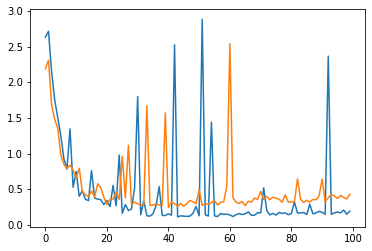

In [ ]:
for i in range(0, len(Total_val_loss)):
  plt.plot(Total_val_loss[i])

## Training on whole train set and testing on test set ( no cross validation)

In [ ]:
Tutor_dataset['key'] == 'kccr_0001'

0       False
1       False
2       False
3       False
4       False
        ...  
7176    False
7177    False
7178    False
7179    False
7180    False
Name: key, Length: 7181, dtype: bool

In [ ]:
epochs = 200; lr = 0.00001;

df_loss_accuracy_crossval = pd.DataFrame(columns=['Train Loss', 'Train Accuracy', 'Val Loss', 'Val Accuracy', 'Test Loss', 'Test Accuracy'])
overall_df_loss_accuracy_crossval = pd.DataFrame(columns=['Train Accuracy', 'Val Accuracy', 'Train Seq Accuracy', 'Test Seq Accuracy', 'Test Accuracy Equal Weight'])
Total_val_loss = []

test_accuracy_temp_equal_weight = 0
test_accuracy_equal_weight = 0

def test_sequence_eval(model, syllable_df, encoding):
  model.eval()
  sequence_prediction = []
  actual_prediction = []
  for key in encoding['key'].unique():# [:10]:
    # print(key)
    current_songfile = syllable_df.loc[syllable_df['key']==key]
    sequence_length = current_songfile['indvi'].values[-1]
    current_songfile = current_songfile.sample(frac=1, random_state=2021).reset_index(drop=True)
    sequence_individual_segment = []
    with torch.no_grad():
      for i in range(0, sequence_length):
        y_pred = model(torch.tensor(current_songfile['densenet121_features'].values[i]).resize_(1, 1024).to(device))
        y_label_pred = torch.max(y_pred, 1)[1].to('cpu')
        sequence_individual_segment.append(y_label_pred.numpy()[0])
      sequence_prediction.append(np.bincount(sequence_individual_segment).argmax())
      actual_prediction.append(le.transform(current_songfile['Nest'].values)[-1])
      conf_mat = confusion_matrix(actual_prediction, sequence_prediction)
    # print(key, le.transform(current_songfile['Nest'].values)[-1])
    # print(sequence_individual_segment)
  return accuracy_score(actual_prediction, sequence_prediction), conf_mat, Nest_Equal_weight_accuracy(conf_mat)

def Nest_Equal_weight_accuracy(confusion_matrix):
  Nest_sum = confusion_matrix.sum(axis=1)
  Indv_Nest_Acc = [];
  for i in range(0, Nest_sum.shape[0]):
    Indv_Nest_Acc.append(confusion_matrix[i, i]/Nest_sum[i])
    # print(confusion_matrix[i, i]/Nest_sum[i])
  return np.mean(Indv_Nest_Acc)

def validation_metrics(model_test, X_test, test_targets):
  model_test.eval()
  sum_loss_test = 0.0
  total_test = 0.0
  correct_test = 0.0
  with torch.no_grad():
    for i in range(len(X_test)):
      x = X_test[i].to(device)
      x.resize_(1, 1024)
      y_pred = model_test(x)
      y = torch.tensor(test_targets[i].to(device)).long().resize_((1))
      loss = criterion(y_pred, y)
      sum_loss_test += loss.item()*y.shape[0]
      y_label_pred = torch.max(y_pred, 1)[1]
      correct_test += (y_label_pred == y).float().sum()
      total_test += y.shape[0]
      # print(y, y_label_pred,correct_test, total_test)
  return (sum_loss_test/total_test), (correct_test/total_test)

current_random_number = 2021;

def data_shuffle(input_dataset):
  encoding, le = data_splitting_based_on_sample_size(input_dataset)    # Set which dataset to train on over here
  encoding = encoding.sample(frac=1, random_state=int(np.random.randint(9999, size=1))).reset_index(drop=True)

  X_total = []; y_total = [];
  for key in encoding['key'].unique():# [:10]:
      current_songfile = input_dataset.loc[input_dataset['key']==key]
      sequence_length = current_songfile['indvi'].values[-1]
      for i in range(0, sequence_length):
        X_total.append(torch.tensor(current_songfile['densenet121_features'].values[i]))
        y_total.append(current_songfile['Nest'].values[i])

  targets_total = torch.as_tensor(le.transform(y_total), dtype=torch.long)

  return X_total, y_total, targets_total

X_train, y_train, targets_train = data_shuffle(Tutor_dataset)
X_test, y_test, targets_test = data_shuffle(Pupil_dataset)

targets_train = torch.as_tensor(le.transform(y_train), dtype=torch.long)
targets_test = torch.as_tensor(le.transform(y_test), dtype=torch.long)

train_target_occ = pd.DataFrame.from_dict(Counter(targets_train.numpy()), orient='index').reset_index()
train_target_occ = train_target_occ.rename(columns={'index':'Nest_encoding', 0:'count'}).sort_values(by=['Nest_encoding'])

class_weights = torch.tensor(train_target_occ['count'].min()/train_target_occ['count'].values, dtype=float).to(device)
# print(class_weights)

model = LinearClassifier3layer(hidden_dim=128, output_dim=len(np.unique(encoded_targets['Nest']))).to(device)   ##  SET MODEL HERE
print(model.eval())
# criterion = torch.nn.CrossEntropyLoss(weight=class_weights.float())
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
# model.train()

epoch_best_loss = 0
epoch_best_acc = 0
epoch_best_val_loss = 0
epoch_best_val_acc = 0
overall_best_model_train_acc = 0
overall_best_model_stats = []
valid_loss_epoch = []
test_loss_epoch = []

best_model_test_seq_acc = 0;
best_model_train_seq_acc = 0;

for epoch in range(epochs):
  model.train()
  epoch_loss = 0
  epoch_acc = 0    
  sum_loss = 0
  # loss = 0
  train_correct = 0
  train_total = 0
  X_train, y_train, targets_train = data_shuffle(Tutor_dataset)
  # optimizer.zero_grad()

  for i in range(len(X_train)):
    x = X_train[i].to(device)
    x.resize_(1, 1024)
    y_pred = model(x)
    y = torch.tensor(targets_train[i].to(device)).long().resize_((1))
    optimizer.zero_grad()
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    sum_loss += loss.item()*y.shape[0]
    
    # loss += criterion(y_pred, y)
    
    y_label_pred = torch.max(y_pred, 1)[1]
    train_correct += (y_label_pred == y).float().sum()
    train_total += y.shape[0]
  # loss.backward()
  # optimizer.step()
  # sum_loss = loss.item()*y.shape[0]
  epoch_loss = sum_loss/train_total
  epoch_acc = train_correct/train_total  
  val_loss, val_accuracy = validation_metrics(model, X_train, targets_train)
  test_loss, test_accuracy = validation_metrics(model, X_test, targets_test)
  train_seq_acc, train_conf_mat, train_acuracy_equal_weight = test_sequence_eval(model, Tutor_dataset, encoded_targets)
  test_seq_acc, test_conf_mat, test_accuracy_equal_weight = test_sequence_eval(model, Pupil_dataset, encoded_targets_test)
  print("Epoch %d, train loss %.3f train accuracy %.3f val loss %.3f val accuracy %.3f train seq accuracy %.3f test seq accuracy %.3f test seq ew accuracy %.3f" %(epoch, epoch_loss, epoch_acc, val_loss, val_accuracy, train_seq_acc, test_seq_acc, test_accuracy_equal_weight))
  valid_loss_epoch.append(val_loss)
  test_loss_epoch.append(test_loss)
  
  if epoch_best_acc <= epoch_acc:
    if epoch_best_val_acc <= val_accuracy:        
      epoch_best_acc = epoch_acc
      epoch_best_val_acc = val_accuracy
      epoch_best_val_loss = val_loss
      epoch_best_loss = epoch_loss
      epoch_best_val_acc_equal_weight = train_acuracy_equal_weight
      test_accuracy_temp_equal_weight = test_accuracy_equal_weight
      now = datetime.now() 
      dt_string = now.strftime("%d_%m_%Y_%H_%M")
      best_model = model
      print('Saving overall best train val model')
      if best_model_test_seq_acc <= test_seq_acc:
        best_model_test_seq_acc = test_seq_acc
        best_model_train_seq_acc = train_seq_acc
        best_model_test_acc_equal_weight = test_accuracy_equal_weight
        overall_best_model = model
        overall_best_model_stats = [ epoch_best_acc.to('cpu').numpy(), epoch_best_val_acc.to('cpu').numpy(), best_model_train_seq_acc, best_model_test_seq_acc, best_model_test_acc_equal_weight]
        print('Saving overall best test model')
      elif overall_best_model_train_acc < epoch_acc:
          best_model_test_seq_acc = test_seq_acc
          best_model_train_seq_acc = train_seq_acc
          best_model_test_acc_equal_weight = test_accuracy_equal_weight
          overall_best_model = model
          overall_best_model_train_acc = epoch_acc
          overall_best_model_stats = [ epoch_best_acc.to('cpu').numpy(), epoch_best_val_acc.to('cpu').numpy(), best_model_train_seq_acc, best_model_test_seq_acc, best_model_test_acc_equal_weight]
          overall_best_test_conf_matrix = pd.DataFrame(test_conf_mat, index=[class_label+'_True' for class_label in list(le.classes_)], columns=[class_label+'_Pred' for class_label in list(le.classes_)])
          print('Replacing overall best test model')
      
# df_loss_accuracy_crossval = df_loss_accuracy_crossval.append({'Train Loss': epoch_best_loss , 'Train Accuracy': epoch_best_acc.numpy(),  'Val Loss':  epoch_best_val_loss, 
#                                           'Val Accuracy': epoch_best_val_acc.numpy(), 'Test Loss': best_model_test_loss, 'Test Accuracy': best_model_test_acc.numpy()}, ignore_index=True) 
# torch.save(best_model, '/content/gdrive/My Drive/ZFDataset/FullDataset/SavedModels/Baseline/'+'Total_'+dt_string+'TrainSeq_'+str(np.round(best_model_train_seq_acc,4))+'TestSeq_'+str(np.round(best_model_test_seq_acc,4)))
torch.save(overall_best_model, '/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/Baseline/'+'Total_'+dt_string+'TrainSeq_'+str(np.round(best_model_train_seq_acc,4))+'TestSeq_'+str(np.round(best_model_test_seq_acc,4))+'_EW_Test_'+str(np.round(best_model_test_acc_equal_weight,4)))
df_loss_accuracy_crossval = df_loss_accuracy_crossval.append({'Train Loss': epoch_best_loss , 'Train Accuracy': epoch_best_acc.to('cpu').numpy(),  'Val Loss':  epoch_best_val_loss, 
                                          'Val Accuracy': epoch_best_val_acc.to('cpu').numpy(), 'Train Seq Accuracy': np.round(best_model_train_seq_acc,4), 'Test Seq Accuracy': np.round(best_model_test_seq_acc,4), 
                                          'Test Accuracy Equal Weight': test_accuracy_temp_equal_weight}, ignore_index=True)

overall_df_loss_accuracy_crossval = overall_df_loss_accuracy_crossval.append(pd.Series(overall_best_model_stats, index=overall_df_loss_accuracy_crossval.columns.values), ignore_index=True)

# Total_val_loss.append(val_loss_epoch)
# Total_test_loss.append(test_loss_epoch)

# overall_best_test_conf_matrix.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/Final Architecture/Baseline/'+'Conf_Mat_Test_Random_'+str(current_random_number)+'.csv')
# overall_df_loss_accuracy_crossval.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/Final Architecture/Baseline/'+'Accuracy_Table_Test_Random_'+str(current_random_number)+'.csv')

# del model
# print("Model deleted")

LinearClassifier3layer(
  (linear1): Linear(in_features=1024, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch 0, train loss 2.300 train accuracy 0.088 val loss 2.289 val accuracy 0.116 train seq accuracy 0.120 test seq accuracy 0.109 test seq ew accuracy 0.100
Saving overall best train val model
Saving overall best test model
Epoch 1, train loss 2.280 train accuracy 0.153 val loss 2.270 val accuracy 0.184 train seq accuracy 0.163 test seq accuracy 0.061 test seq ew accuracy 0.113
Saving overall best train val model
Replacing overall best test model
Epoch 2, train loss 2.262 train accuracy 0.175 val loss 2.254 val accuracy 0.172 train seq accuracy 0.157 test seq accuracy 0.191 test seq ew accuracy 0.170
Epoch 3, train loss 2.246 train accuracy 0.173 val loss 2.238 val accuracy 0.172 train seq accuracy 0.157 test seq accuracy 0.214 test seq ew accuracy 0.158
Epoch 4, train loss 2.230 train accuracy 0.178 val loss 2.222 val accuracy 0.182 train seq accuracy 0.148 test seq accuracy 0.216 test seq ew accuracy 0.140
Epoch 5, train loss 2.214 train accuracy 0.193 val loss 2.206 val accuracy 0.2

In [ ]:
import matplotlib.pyplot as plt

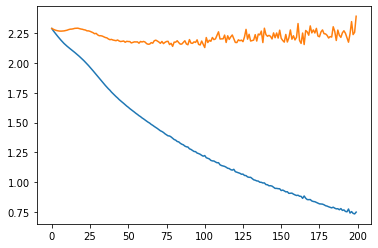

In [ ]:
plt.plot(valid_loss_epoch)
plt.plot(test_loss_epoch)
# plt.plot(Total_test_loss[0])

In [ ]:
df_loss_accuracy_crossval

,Train Loss,Train Accuracy,Val Loss,Val Accuracy,Test Loss,Test Accuracy,Test Accuracy Equal Weight,Test Seq Accuracy,Train Seq Accuracy
0,0.37178,0.89346886,0.437981,0.86506057,NaN,NaN,0.471949,0.5687,0.9908


In [ ]:
overall_df_loss_accuracy_crossval

NameError: ignored

In [ ]:
Nest_Equal_weight_accuracy(test_conf_mat)

0.3977957750144352

In [ ]:
test_conf_mat

array([[  0,   0,   0,   0,   5,   2,   0,   0,   0,   0],
       [  0,  16,   0,   1,   0,   0,  43,   0,   0,   1],
       [  0,   0,  13,  64,   1,   3,   4,   0,   0,   1],
       [  0,   0,   0,  83,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   2,   2,   8,  20,   0,   0,   0],
       [  0,   0,   0,   1,   0,  35,   3,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0, 106,   0,   0,   0],
       [  0,   0,   0,   1,   2,   1,  21,   5,   0,  27],
       [  1,   0,   3,   3,   2,   3,   9,   0,   9,   0],
       [  0,   0,   0,  16,   0,   0,   0,   0,   0,   5]])

In [ ]:
df_loss_accuracy_crossval = df_loss_accuracy_crossval.append({'Train Loss': epoch_best_loss , 'Train Accuracy': epoch_best_acc.to('cpu').numpy(),  'Val Loss':  epoch_best_val_loss, 
                                          'Val Accuracy': epoch_best_val_acc.to('cpu').numpy(), 'Train Seq Accuracy': np.round(best_model_train_seq_acc,4), 'Test Seq Accuracy': np.round(best_model_test_seq_acc,4)}, ignore_index=True)

overall_df_loss_accuracy_crossval = overall_df_loss_accuracy_crossval.append(pd.Series(overall_best_model_stats, index=overall_df_loss_accuracy_crossval.columns.values), ignore_index=True)

Total_val_loss.append(val_loss_epoch)

In [ ]:
base_path = '/content/gdrive/My Drive/ZFDataset/'

In [ ]:
model_name = 'Total_22_07_2021_01_41TrainSeq_1.0TestSeq_0.5324'
model = torch.load(base_path+'SavedModels/FullDataset/Baseline/'+model_name)
model.eval()

LinearClassifier2layer(
  (linear1): Linear(in_features=1024, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
print(model.eval())

LinearClassifier2layer(
  (linear1): Linear(in_features=1024, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
le.inverse_transform([np.bincount(sequence_individual_segment).argmax()]).tolist()

['Nest3']

In [ ]:
model.eval()
sequence_prediction = []
sequence_prediction_label = []
actual_label = []

for key in encoded_targets_test['key'].unique():# [:10]:
  # print(key)
  current_songfile = Pupil_dataset.loc[Pupil_dataset['key']==key]
  sequence_length = current_songfile['indvi'].values[-1]
  # current_songfile = current_songfile.sample(frac=1, random_state=2021).reset_index(drop=True)
  sequence_individual_segment = []
  for i in range(0, sequence_length):
    y_pred = model(torch.tensor(current_songfile['densenet121_features'].values[i]).resize_(1, 1024).to(device))
    y_label_pred = torch.max(y_pred, 1)[1].to('cpu')
    sequence_individual_segment.append(y_label_pred.numpy()[0])
  sequence_prediction.append(np.bincount(sequence_individual_segment).argmax())
  actual_label.append(le.transform(current_songfile['Nest'].values)[-1])
  sequence_prediction_label.extend(le.inverse_transform([np.bincount(sequence_individual_segment).argmax()]).tolist())

In [ ]:
encoded_targets_test['Nest Pred'] = sequence_prediction_label

In [ ]:
encoded_targets_test

,targets,indvi,key,Nest,Nest Pred
0,8,kfgj,kfgj_0012,Nest8,Nest5
1,3,khxv,khxv_0046,Nest3,Nest3
2,7,onsu,onsu_0007,Nest7,Nest9
3,1,sdhp,sdhp_0020,Nest11,Nest6
4,2,nsrn,nsrn_0007,Nest2,Nest3
...,...,...,...,...,...
519,2,nsrn,nsrn_0017,Nest2,Nest3
520,3,khxv,khxv_0042,Nest3,Nest3
521,2,nsrn,nsrn_0030,Nest2,Nest3
522,6,kccr,kccr_0000,Nest6,Nest6


In [ ]:
encoded_targets_test.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/Baseline/'+'IndividualID_Nest'+'.csv')

In [ ]:
overall_best_test_conf_matrix

,Nest10_Pred,Nest11_Pred,Nest2_Pred,Nest3_Pred,Nest4_Pred,Nest5_Pred,Nest6_Pred,Nest7_Pred,Nest8_Pred,Nest9_Pred
Nest10_True,0,0,0,0,0,1,6,0,0,0
Nest11_True,0,6,0,0,0,0,55,0,0,0
Nest2_True,0,0,27,16,0,1,42,0,0,0
Nest3_True,0,0,0,81,0,0,3,0,0,0
Nest4_True,0,0,0,1,0,1,30,0,0,0
Nest5_True,0,0,0,0,0,21,18,0,0,0
Nest6_True,0,0,0,0,0,0,107,0,0,0
Nest7_True,0,2,0,0,0,0,36,4,0,15
Nest8_True,0,0,4,1,0,2,22,0,1,0
Nest9_True,0,0,0,15,0,0,0,0,0,6


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(Total_val_loss[0])

NameError: ignored

In [ ]:
PupilID_Nest = np.zeros(shape=(len(encoded_targets_test['indvi'].unique()), len(encoded_targets_test['Nest'].unique())), dtype=int )

counter = 0;
PupilID_Nest_Names = []
for indvi in encoded_targets_test['indvi'].unique():
  current_Bird = encoded_targets_test.loc[encoded_targets_test['indvi']==indvi]
  PupilID_Nest_Names.extend([str(indvi)+'_'+str(current_Bird['Nest'].values[-1])])
  print(counter, [str(indvi)+'_'+str(current_Bird['Nest'].values[-1])], len(current_Bird['key']))
  for key in current_Bird['key'].unique():
    # print(key, counter, int(le.transform(current_Bird['Nest Pred'].loc[current_Bird['key']==key].values)) , PupilID_Nest[counter][int(le.transform(current_Bird['Nest Pred'].loc[current_Bird['key']==key].values))])
    PupilID_Nest[counter][int(le.transform(current_Bird['Nest Pred'].loc[current_Bird['key']==key].values))] += 1
  counter += 1

0 ['kfgj_Nest8'] 30
1 ['khxv_Nest3'] 48
2 ['onsu_Nest7'] 28
3 ['sdhp_Nest11'] 31
4 ['nsrn_Nest2'] 38
5 ['tbfk_Nest5'] 39
6 ['oogw_Nest3'] 36
7 ['kccr_Nest6'] 63
8 ['inji_Nest9'] 21
9 ['vstd_Nest11'] 30
10 ['bbyj_Nest6'] 44
11 ['qfod_Nest2'] 21
12 ['cxyc_Nest2'] 27
13 ['vusu_Nest7'] 29
14 ['kcos_Nest4'] 32
15 ['hsew_Nest10'] 7


In [ ]:
PupilID_Nest_df = pd.DataFrame(PupilID_Nest, index=PupilID_Nest_Names, columns=[class_label+'_Pred' for class_label in list(le.classes_)])

In [ ]:
PupilID_Nest_df

,Nest10_Pred,Nest11_Pred,Nest2_Pred,Nest3_Pred,Nest4_Pred,Nest5_Pred,Nest6_Pred,Nest7_Pred,Nest8_Pred,Nest9_Pred
kfgj_Nest8,3,0,6,2,0,9,2,0,8,0
khxv_Nest3,0,0,0,44,0,2,2,0,0,0
onsu_Nest7,0,1,0,0,0,0,5,8,0,14
sdhp_Nest11,0,11,0,0,0,0,20,0,0,0
nsrn_Nest2,0,0,10,23,0,0,5,0,0,0
tbfk_Nest5,0,0,0,0,0,39,0,0,0,0
oogw_Nest3,0,0,0,36,0,0,0,0,0,0
kccr_Nest6,0,1,0,0,0,0,62,0,0,0
inji_Nest9,0,0,0,16,0,0,0,0,0,5
vstd_Nest11,0,23,0,1,0,0,6,0,0,0


In [ ]:
PupilID_Nest_df.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/Baseline/'+'PupilID_Nest'+'.csv')

In [ ]:
for _fold, (train_index, val_index) in enumerate(kf.split(range(len(X_total)))):
  print(_fold)
  best_model_test_loss = 0
  best_model_test_acc = 0
  X_train_subset = []; y_train_subset = [];
  X_val_subset = []; y_val_subset = [];

  for indx in train_index:
    X_train_subset.append(X_total[indx])
    y_train_subset.append(y_total[indx])
  targets_train_subset = torch.as_tensor(le.transform(y_train_subset), dtype=torch.long)
  print(Counter(targets_train_subset.numpy()))

  for indx in val_index:
    X_val_subset.append(X_total[indx])
    y_val_subset.append(y_total[indx])
  targets_val_subset = torch.as_tensor(le.transform(y_val_subset), dtype=torch.long)
  print(Counter(targets_val_subset.numpy()))

0
Counter({1: 2929, 0: 2570, 2: 1243, 4: 671, 3: 595})
Counter({1: 411, 0: 256, 2: 148, 3: 58, 4: 17})
1
Counter({1: 3088, 0: 2464, 2: 1227, 4: 634, 3: 595})
Counter({0: 362, 1: 252, 2: 164, 3: 58, 4: 54})
2
Counter({1: 2813, 0: 2668, 2: 1292, 4: 630, 3: 605})
Counter({1: 527, 0: 158, 2: 99, 4: 58, 3: 48})
3
Counter({1: 3106, 0: 2420, 2: 1255, 4: 617, 3: 610})
Counter({0: 406, 1: 234, 2: 136, 4: 71, 3: 43})
4
Counter({1: 2914, 0: 2602, 2: 1282, 4: 631, 3: 579})
Counter({1: 426, 0: 224, 2: 109, 3: 74, 4: 57})
5
Counter({1: 2944, 0: 2598, 2: 1281, 4: 596, 3: 589})
Counter({1: 396, 0: 228, 2: 110, 4: 92, 3: 64})
6
Counter({1: 3127, 0: 2481, 2: 1193, 4: 652, 3: 555})
Counter({0: 345, 1: 213, 2: 198, 3: 98, 4: 36})
7
Counter({1: 2954, 0: 2681, 2: 1209, 3: 597, 4: 567})
Counter({1: 386, 2: 182, 0: 145, 4: 121, 3: 56})
8
Counter({1: 3117, 0: 2461, 2: 1256, 4: 607, 3: 568})
Counter({0: 365, 1: 223, 2: 135, 3: 85, 4: 81})
9
Counter({1: 3068, 0: 2489, 2: 1281, 4: 587, 3: 584})
Counter({0: 337, 1

In [ ]:
train_target_occ = pd.DataFrame.from_dict(Counter(targets_train_subset.numpy()), orient='index').reset_index()
train_target_occ = train_target_occ.rename(columns={'index':'Nest_encoding', 0:'count'}).sort_values(by=['Nest_encoding'])

In [ ]:
train_target_occ

,Nest_encoding,count
0,0,95
4,1,207
2,2,757
3,3,449
1,4,407


In [ ]:
class_weights = torch.tensor(train_target_occ['count'].min()/train_target_occ['count'].values, dtype=float).to(device)

In [ ]:
class_weights

tensor([1.0000, 0.2334, 0.1255, 0.2116, 0.4589], dtype=torch.float64)

In [ ]:
x = Counter(targets_train_subset.numpy())

In [ ]:
type(x)

collections.Counter

In [ ]:
targets_val_subset

tensor([2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,

In [ ]:
model = LinearClassifier(hidden_dim=512, output_dim=len(np.unique(targets)))

In [ ]:
model(x)

tensor([[ 0.2675,  0.0148, -0.2978, -0.0174,  0.1020]],
       grad_fn=<AddmmBackward>)

In [ ]:
df_loss_accuracy_crossval = df_loss_accuracy_crossval.append({'Train Loss': epoch_best_loss , 'Train Accuracy': epoch_best_acc.to('cpu').numpy(),  'Val Loss':  epoch_best_val_loss, 
                                            'Val Accuracy': epoch_best_val_acc.to('cpu').numpy(),
                                            'Train Seq Accuracy' : seq_train_accuracy, 'Test Seq Accuracy' : seq_test_accuracy,}, ignore_index=True)

In [ ]:
df_loss_accuracy_crossval

,Train Loss,Train Accuracy,Val Loss,Val Accuracy,Test Loss,Test Accuracy,Test Seq Accuracy,Train Seq Accuracy
0,0.009796,0.9963427,0.223050,0.9498956,NaN,NaN,0.798450,1.000000
1,0.026011,0.992163,0.120890,0.9749478,NaN,NaN,0.850129,0.992481
2,0.015224,0.9958202,0.327838,0.92693114,NaN,NaN,0.777778,0.969925
3,0.015741,0.99530023,0.381085,0.90794975,NaN,NaN,0.741602,1.000000
4,0.008939,0.9963446,0.099384,0.9769874,NaN,NaN,0.640827,0.992481


In [ ]:
pwd

'/content/gdrive/My Drive/ZFDataset'

In [ ]:
model = torch.load('/content/gdrive/My Drive/ZFDataset/SavedModels/Baseline_Fold0_12_05_2021_16_58TrainSeq_0.2932TestSeq_0.2171').to(device)

In [ ]:
def test_sequence_eval2(model, syllable_df, encoding):
  sequence_prediction = []
  actual_prediction = []
  for key in encoding['key'].unique():# [:10]:
    # print(key)
    current_songfile = syllable_df.loc[syllable_df['key']==key]
    sequence_length = current_songfile['indvi'].values[-1]
    current_songfile = current_songfile.sample(frac=1, random_state=2021).reset_index(drop=True)
    sequence_individual_segment = []
    for i in range(0, sequence_length):
      y_pred = model(torch.tensor(current_songfile['densenet121_features'].values[i]).resize_(1, 1024).to(device))
      y_label_pred = torch.max(y_pred, 1)[1].to('cpu')
      sequence_individual_segment.append(y_label_pred.numpy()[0])
    sequence_prediction.append(np.bincount(sequence_individual_segment).argmax())
    actual_prediction.append(le.transform(current_songfile['Nest'].values)[-1])
    print(key, le.transform(current_songfile['Nest'].values)[-1])
    print(sequence_individual_segment)
  return accuracy_score(sequence_prediction, actual_prediction)

In [ ]:
le.classes_

array(['Nest1', 'Nest2', 'Nest3', 'Nest4', 'Nest5'], dtype='<U5')

In [ ]:
num_occurences

,targets,indvi,key
Nest,,,
Nest1,1,1,7
Nest2,1,1,17
Nest3,1,1,39
Nest4,1,1,34
Nest5,1,1,36


In [ ]:
class_weights

tensor([1.0000, 0.4118, 0.1795, 0.2059, 0.1944], dtype=torch.float64)

In [ ]:
seq_train_accuracy = test_sequence_eval2(model, Tutor_dataset, encoded_targets)

ivoj_0004 0
[2, 2, 2, 2, 2, 2, 2, 2, 2]
ttog_0021 4
[2, 2, 2, 2, 2, 2]
ivoj_0002 0
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
xsup_0006 2
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
gthh_0011 3
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
gthh_0017 3
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
xsup_0015 2
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
xsup_0010 2
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
gthh_0033 3
[2, 2, 2, 2, 2, 2, 2]
ivoj_0000 0
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
ttog_0029 4
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
nzen_0006 1
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
nzen_0001 1
[2, 2, 2, 2, 2, 2, 2, 2]
gthh_0025 3
[2, 2, 2, 2, 2, 2, 2]
xsup_0023 2
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
xsup_0004 2
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
ttog_0022 4
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
train_seq

In [ ]:
seq_train_accuracy

0.046511627906976744

In [ ]:
seq_test_accuracy = test_sequence_eval(model, Pupil_dataset, encoded_targets_test)

cyea_0000
cyea_0000 0
[36, 126, 3, 36, 96, 3, 96, 36]
cyea_0001
cyea_0001 0
[36, 36, 36, 36, 36, 3, 96, 36]
cyea_0002
cyea_0002 0
[36, 36, 3, 36, 36, 3, 96, 36]
cyea_0003
cyea_0003 0
[36, 96, 3, 3, 36, 96, 36, 36, 36]
cyea_0004
cyea_0004 0
[4, 36, 3, 36, 96, 36, 36, 36, 96, 96, 36, 110, 36]
cyea_0005
cyea_0005 0
[36, 36, 36, 36, 36, 53, 96, 3]
cyea_0006
cyea_0006 0
[36, 3, 36, 36, 36, 3, 96, 117]
cyea_0007
cyea_0007 0
[36, 36, 36, 36, 4, 3, 96, 36]
cyea_0008
cyea_0008 0
[36, 36, 36, 36, 4, 53, 96, 36]
cyea_0009
cyea_0009 0
[36, 96, 3, 3, 36, 96, 62, 36, 36]
cyea_0010
cyea_0010 0
[36, 36, 3, 3, 62, 3, 96, 36]
cyea_0011
cyea_0011 0
[36, 36, 3, 36, 36, 3, 96, 36]
cyea_0012
cyea_0012 0
[3, 3, 36, 36, 4, 36]
cyea_0013
cyea_0013 0
[36, 36, 36, 36, 4, 3, 96, 110]
cyea_0014
cyea_0014 0
[36, 3, 36, 4, 53, 96, 110]
cyea_0015
cyea_0015 0
[3, 36, 36, 36, 36]
cyea_0016
cyea_0016 0
[36, 36, 36, 36, 62, 3, 96, 36]
cyea_0017
cyea_0017 0
[36, 96, 3, 36, 36, 96, 36, 110, 36]
cyea_0018
cyea_0018 0
[3, 96

In [ ]:
seq_test_accuracy

0.7984496124031008

In [ ]:
syllable_df = Pupil_dataset

In [ ]:
model.train()

LinearClassifier(
  (linear1): Linear(in_features=1024, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=5, bias=True)
)

In [ ]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'add_m

In [ ]:
current_songfile = syllable_df.loc[syllable_df['key']==key]
sequence_length = current_songfile['indvi'].values[-1]
current_songfile = current_songfile.sample(frac=1, random_state=2021).reset_index(drop=True)
sequence_individual_segment = []
for i in range(0, sequence_length):
  y_pred = model(torch.tensor(current_songfile['densenet121_features'].values[i]).resize_(1, 1024).to(device))
  y_label_pred = torch.max(y_pred, 1)[1].to('cpu')
  sequence_individual_segment.append(y_label_pred.numpy()[0])
  print(y_pred, 1)
  print(torch.max(y_pred, 1))

tensor([[0.0000, 0.0000, 0.0000, 2.7909, 4.0111, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.3184, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         9.5615, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 3.0121,
         0.0000, 0.0000, 0.1263, 0.0000, 0.0000, 0.0000, 0.4224, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 2.0825, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4880, 2.6779, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 3.5809, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [ ]:
i = 1
y_pred = model(torch.tensor(current_songfile['densenet121_features'].values[i]).resize_(1, 1024).to(device))
y_label_pred = torch.max(y_pred, 1)[1].to('cpu')
sequence_individual_segment.append(y_label_pred.numpy()[0])
print(y_pred, 1)
print(torch.max(y_pred, 1)[1].to('cpu'))

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5214, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         2.3981, 0.0000, 2.3481, 0.4892, 0.0000, 0.0000, 2.8020, 0.0000, 0.2345,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 4.3205,
         0.0000, 0.0000, 0.0000, 0.0000, 0.6267, 1.3211, 0.0000, 2.2244, 0.0000,
         0.0000, 0.5694, 0.1051, 0.0000, 0.0000, 0.0000, 0.6227, 0.0000, 0.0000,
         1.4789, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.7624, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0101, 3.6504, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.3121, 0.0000, 0.0000, 0.0000, 0.5687,
         0.0000, 0.0000, 2.7355, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.9918, 0.0000, 0.3908, 1.5499, 0.0000, 0.0000, 0.0000,
         2.5221, 0.0000, 0.0

In [ ]:
model_new = LinearClassifier(hidden_dim=128, output_dim=len(np.unique(targets))).to(device)

In [ ]:
model_new(torch.tensor(current_songfile['densenet121_features'].values[i]).resize_(1, 1024).to(device))

tensor([[0.2154, 0.4629, 1.0233, 0.4854, 0.0000]], device='cuda:0',
       grad_fn=<ReluBackward0>)

In [ ]:
x1 = F.relu(model.linear1(torch.tensor(current_songfile['densenet121_features'].values[i]).resize_(1, 1024).to(device)))
x2 = model.linear3(x1)

In [ ]:
x2

tensor([[ 9.2596, -7.3077, -0.2292, -9.3619,  6.4947]], device='cuda:0',
       grad_fn=<AddmmBackward>)

In [ ]:
current_songfile = syllable_df.loc[syllable_df['key']==key]

In [ ]:
current_songfile = current_songfile.sample(frac=1, random_state=2021).reset_index(drop=True)

In [ ]:
current_songfile

,start_time,end_time,labels,indv,indvi,key,audio,rate,spectrogram,labels_indv,densenet121_features,Nest
0,0.505598,0.552582,i,tbfk,4,tbfk_0037,"[-0.00019636632, -0.00011087562, 0.00011899666...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",tbfk_i,"[0.00035573693, 0.0059586586, 0.0024591961, 0....",Nest5
1,1.535054,1.658591,a,tbfk,10,tbfk_0037,"[-0.0036366456, -0.0036538602, -0.0037256074, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",tbfk_a,"[0.0004193636, 0.004206814, 0.002283146, 0.002...",Nest5
2,3.786278,3.976550,c,tbfk,20,tbfk_0037,"[-0.0018684561, -0.0028802825, -0.0035185874, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",tbfk_c,"[0.00047820015, 0.0053550308, 0.0019423104, 0....",Nest5
3,1.687298,1.930473,b,tbfk,11,tbfk_0037,"[0.0025684354, 0.0027094097, 0.0023444323, 0.0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",tbfk_b,"[0.00040158973, 0.004648357, 0.0024476568, 0.0...",Nest5
4,0.408206,0.455666,i,tbfk,3,tbfk_0037,"[0.00034006516, 0.0004238533, 0.0011047416, 0....",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",tbfk_i,"[0.00035663077, 0.005356712, 0.0025559189, 0.0...",Nest5
5,0.584963,0.643262,i,tbfk,5,tbfk_0037,"[-0.0026012685, -0.0030763852, -0.0028974195, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",tbfk_i,"[0.00035347737, 0.00536384, 0.0023823886, 0.00...",Nest5
6,1.355280,1.513512,d,tbfk,9,tbfk_0037,"[0.0033217536, 0.0041787946, 0.0036869275, 0.0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",tbfk_d,"[0.00044134023, 0.0058528148, 0.0017248018, 0....",Nest5
7,3.156187,3.319385,D,tbfk,17,tbfk_0037,"[-0.00017250945, -0.0002446745, -0.00015178893...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",tbfk_D,"[0.00049479626, 0.0063569997, 0.0015375959, 0....",Nest5
8,1.969815,2.157729,c,tbfk,12,tbfk_0037,"[-0.0028657683, -0.0021657909, -0.0012662874, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",tbfk_c,"[0.0005002575, 0.0046948665, 0.0022767636, 0.0...",Nest5
9,1.098274,1.280020,c,tbfk,8,tbfk_0037,"[0.00032339332, 0.00075202825, 0.0012105576, 0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",tbfk_c,"[0.00055941334, 0.0055074333, 0.0018285438, 0....",Nest5


In [ ]:
test_accuracy = test_sequence_eval(model, Pupil_dataset, encoded_targets_test)

cyea_0000
cyea_0001
cyea_0002
cyea_0003
cyea_0004
cyea_0005
cyea_0006
cyea_0007
cyea_0008
cyea_0009
cyea_0010
cyea_0011
cyea_0012
cyea_0013
cyea_0014
cyea_0015
cyea_0016
cyea_0017
cyea_0018
cyea_0019
cyea_0020
cyea_0021
cyea_0022
cyea_0023
cyea_0024
cyea_0025
cyea_0026
cyea_0027
cyea_0028
cyea_0029
cyea_0030
cyea_0031
cyea_0032
cyea_0033
cyea_0034
cyea_0035
cyea_0036
cyea_0037
cyea_0038
cyea_0039
cyea_0040
hphi_0000
hphi_0001
hphi_0002
hphi_0003
hphi_0004
hphi_0005
hphi_0006
hphi_0007
hphi_0008
hphi_0009
hphi_0010
hphi_0011
hphi_0012
hphi_0013
hphi_0014
hphi_0015
hphi_0016
hphi_0017
hphi_0018
hphi_0019
hphi_0020
hphi_0021
hphi_0022
hphi_0023
hphi_0024
hphi_0025
hphi_0026
hphi_0027
hphi_0028
hphi_0029
hphi_0030
hphi_0031
hphi_0032
hphi_0033
hphi_0034
hphi_0035
hphi_0036
hphi_0037
hphi_0038
hphi_0039
hphi_0040
hphi_0041
hphi_0042
hphi_0043
phpd_0000
phpd_0001
phpd_0002
phpd_0003
phpd_0004
phpd_0005
phpd_0006
phpd_0007
phpd_0008
phpd_0009
phpd_0010
phpd_0011
phpd_0012
phpd_0013
phpd_0014


In [ ]:
test_accuracy

0.1834625322997416

In [ ]:
confusion_matrix(sequence_prediction, actual_prediction)

In [ ]:
accuracy_score(sequence_prediction, actual_prediction)

0.8036175710594315

In [ ]:
def validation_metrics(model_test, X_test, test_targets):
  model_test.eval()
  sum_loss_test = 0.0
  total_test = 0.0
  correct_test = 0.0
  for i in range(len(X_test)):
    x = X_test[i]
    x.resize_(1, 1024)
    y_pred = model_test(x)
    y = torch.tensor(test_targets[i]).long().resize_((1))
    loss = criterion(y_pred, y)
    sum_loss_test += loss.item()*y.shape[0]
    y_label_pred = torch.max(y_pred, 1)[1]
    correct_test += (y_label_pred == y).float().sum()
    total_test += y.shape[0]
    # print(y, y_label_pred,correct_test, total_test)
  return (sum_loss_test/total_test), (correct_test/total_test)

for epoch in range(100):
  model.train()
  sum_loss = 0.0
  total = 0.0
  correct = 0.0
  for i in range(len(X_total)):
    x = X_total[i]
    x.resize_(1, 1024)
    y_pred = model(x)
    y = torch.tensor(targets[i]).long().resize_((1))
    optimizer.zero_grad()
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    sum_loss += loss.item()*y.shape[0]
    y_label_pred = torch.max(y_pred, 1)[1]
    correct += (y_label_pred == y).float().sum()
    total += y.shape[0]
  val_loss, val_accuracy = validation_metrics(model, X_test, test_targets)
  print("Epoch %d, train loss %.3f train accuracy %.3f test loss %.3f test accuracy %.3f" %(epoch, (sum_loss/total), (correct/total), val_loss, val_accuracy))

Epoch 0, train loss 0.003 train accuracy 1.000 test loss 1.239 test accuracy 0.878
Epoch 1, train loss 0.004 train accuracy 0.998 test loss 1.829 test accuracy 0.808
Epoch 2, train loss 0.008 train accuracy 0.998 test loss 1.662 test accuracy 0.786
Epoch 3, train loss 0.003 train accuracy 1.000 test loss 1.016 test accuracy 0.908
Epoch 4, train loss 0.005 train accuracy 0.998 test loss 1.497 test accuracy 0.859
Epoch 5, train loss 0.019 train accuracy 0.997 test loss 1.129 test accuracy 0.878
Epoch 6, train loss 0.004 train accuracy 0.999 test loss 0.818 test accuracy 0.905
Epoch 7, train loss 0.003 train accuracy 0.999 test loss 0.987 test accuracy 0.888
Epoch 8, train loss 0.013 train accuracy 0.996 test loss 1.268 test accuracy 0.808
Epoch 9, train loss 0.009 train accuracy 0.998 test loss 0.686 test accuracy 0.927
Epoch 10, train loss 0.002 train accuracy 1.000 test loss 0.746 test accuracy 0.917
Epoch 11, train loss 0.002 train accuracy 1.000 test loss 0.734 test accuracy 0.929
Ep

In [ ]:
torch.save(model, 'Baseline_Nest1')

# # Model class must be defined somewhere
# model = torch.load(PATH)
# model.eval()

In [ ]:
y_actual_total = []
y_pred_total = []
for i in range(len(X_test)):
    x = X_test[i]
    x.resize_(1, 1024)
    y_pred = model(x)
    y = torch.tensor(test_targets[i]).long().resize_((1))
    y_label_pred = torch.max(y_pred, 1)[1]
    y_actual_total.append(y.numpy())
    y_pred_total.append(y_label_pred.numpy())
    print (i, y, y_label_pred)

0 tensor([0]) tensor([0])
1 tensor([0]) tensor([0])
2 tensor([0]) tensor([0])
3 tensor([0]) tensor([0])
4 tensor([0]) tensor([0])
5 tensor([0]) tensor([1])
6 tensor([0]) tensor([1])
7 tensor([0]) tensor([0])
8 tensor([0]) tensor([0])
9 tensor([0]) tensor([0])
10 tensor([0]) tensor([0])
11 tensor([0]) tensor([0])
12 tensor([0]) tensor([0])
13 tensor([0]) tensor([0])
14 tensor([0]) tensor([0])
15 tensor([0]) tensor([0])
16 tensor([0]) tensor([0])
17 tensor([0]) tensor([1])
18 tensor([0]) tensor([0])
19 tensor([0]) tensor([0])
20 tensor([0]) tensor([0])
21 tensor([0]) tensor([0])
22 tensor([0]) tensor([0])
23 tensor([0]) tensor([0])
24 tensor([0]) tensor([1])
25 tensor([0]) tensor([0])
26 tensor([0]) tensor([0])
27 tensor([0]) tensor([0])
28 tensor([0]) tensor([1])
29 tensor([0]) tensor([0])
30 tensor([0]) tensor([1])
31 tensor([0]) tensor([0])
32 tensor([0]) tensor([0])
33 tensor([0]) tensor([0])
34 tensor([0]) tensor([0])
35 tensor([0]) tensor([0])
36 tensor([0]) tensor([0])
37 tensor([

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_actual_total, y_pred_total)
# Confusion_Matrix.print_stats()

array([[ 60,  20,   0,   0],
       [  0,  94,   0,   0],
       [  0,   2,  99,  14],
       [  0,   1,   7, 114]])

In [ ]:
sequence_prediction = []
actual_prediction = []
for key in encoded_targets_test['key'].unique():# [:10]:
  print(key)
  current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==key]
  sequence_length = current_songfile['indvi'].values[-1]
  sequence_individual_segment = []
  if key in test_keys:
    for i in range(0, sequence_length):
      y_pred = model(torch.tensor(current_songfile['densenet121_features'].values[i]).resize_(1, 1024))
      y_label_pred = torch.max(y_pred, 1)[1]
      sequence_individual_segment.append(y_label_pred.numpy()[0])
    sequence_prediction.append(np.bincount(sequence_individual_segment).argmax())
    actual_prediction.append(le.transform(current_songfile['indv'].values)[-1])

cyea_0000
cyea_0001
cyea_0002
cyea_0003
cyea_0004
cyea_0005
cyea_0006
cyea_0007
cyea_0008
cyea_0009
cyea_0010
cyea_0011
cyea_0012
cyea_0013
cyea_0014
cyea_0015
cyea_0016
cyea_0017
cyea_0018
cyea_0019
cyea_0020
cyea_0021
cyea_0022
cyea_0023
cyea_0024
cyea_0025
cyea_0026
cyea_0027
cyea_0028
cyea_0029
cyea_0030
cyea_0031
cyea_0032
cyea_0033
cyea_0034
cyea_0035
cyea_0036
cyea_0037
cyea_0038
cyea_0039
cyea_0040
hphi_0000
hphi_0001
hphi_0002
hphi_0003
hphi_0004
hphi_0005
hphi_0006
hphi_0007
hphi_0008
hphi_0009
hphi_0010
hphi_0011
hphi_0012
hphi_0013
hphi_0014
hphi_0015
hphi_0016
hphi_0017
hphi_0018
hphi_0019
hphi_0020
hphi_0021
hphi_0022
hphi_0023
hphi_0024
hphi_0025
hphi_0026
hphi_0027
hphi_0028
hphi_0029
hphi_0030
hphi_0031
hphi_0032
hphi_0033
hphi_0034
hphi_0035
hphi_0036
hphi_0037
hphi_0038
hphi_0039
hphi_0040
hphi_0041
hphi_0042
hphi_0043
ivoj_0000
ivoj_0001
ivoj_0002
ivoj_0003
ivoj_0004
ivoj_0005
ivoj_0006
phpd_0000
phpd_0001
phpd_0002
phpd_0003
phpd_0004
phpd_0005
phpd_0006
phpd_0007


In [ ]:
print(sequence_prediction, actual_prediction )

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [ ]:
print("Sequence Accuracy :", sum(1 for x,y in zip(sequence_prediction,actual_prediction) if x == y) / len(actual_prediction))

Sequence Accuracy : 0.2903225806451613


In [ ]:
current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==key]

In [ ]:
sequence_length = current_songfile['indvi'].values[-1]

In [ ]:
sequence_length

5

In [ ]:
sequence_individual_segment = []
for i in range(0, sequence_length):
  y_pred = model(torch.tensor(current_songfile['densenet121_features'].values[i]).resize_(1, 1024))
  y_label_pred = torch.max(y_pred, 1)[1]
  sequence_individual_segment.append(y_label_pred.numpy()[0])

In [ ]:
sequence_individual_segment

[3, 3, 3, 3, 3]

In [ ]:
y_label_pred.numpy()[0]

3

In [ ]:
np.bincount(sequence_individual_segment).argmax()

3

In [ ]:
torch.max(y_pred, 1)

IndexError: ignored

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(syllable_df_Nest_Total['indv'].to_list())

LabelEncoder()

In [ ]:
targets = le.transform(syllable_df_Nest_Total['indv'].to_list())

In [ ]:
targets

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
list(le.classes_)

['cyea', 'hphi', 'ivoj', 'phpd']

In [ ]:
syllable_df_Nest_Total['indv_encoded'] = targets

In [ ]:
syllable_df_Nest_Total

,start_time,end_time,labels,indv,indvi,key,audio,rate,spectrogram,labels_indv,densenet121_features,indv_encoded
0,0.103084,0.133787,-,cyea,1,cyea_0000,"[-0.0037507678, -0.0037730576, -0.0033396403, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",cyea_-,"[0.00036964213, 0.0061388216, 0.0023623325, 0....",0
1,0.197664,0.342063,a,cyea,2,cyea_0000,"[-0.0016009295, -0.00080086064, 0.00024397256,...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",cyea_a,"[0.00039546576, 0.0042689457, 0.0021646945, 0....",0
2,0.369546,0.536848,b,cyea,3,cyea_0000,"[0.0028250518, 0.0025573175, 0.002130959, 0.00...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",cyea_b,"[0.00043923515, 0.0035873966, 0.0023025582, 0....",0
3,0.559955,0.687823,c,cyea,4,cyea_0000,"[0.00036472746, 0.00013401418, -0.00052369735,...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",cyea_c,"[0.0004885812, 0.0055127405, 0.0017675881, 0.0...",0
4,0.726644,0.832925,d,cyea,5,cyea_0000,"[0.0033374317, 0.004109387, 0.003555804, 0.002...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",cyea_d,"[0.00040706727, 0.004342597, 0.0018088806, 0.0...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
2934,0.102356,0.135123,0,phpd,1,phpd_0062,"[-0.0035796678, 0.00066409475, 0.0039508683, 0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",phpd_0,"[0.00035229328, 0.0069653825, 0.00236547, 0.00...",3
2935,0.228433,0.287435,0,phpd,2,phpd_0062,"[0.0010511333, 0.00033233757, -0.00028101055, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",phpd_0,"[0.00036833377, 0.006149904, 0.0025585291, 0.0...",3
2936,0.323399,0.392424,0,phpd,3,phpd_0062,"[0.0036439702, 0.001985288, 0.00042269952, -0....",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",phpd_0,"[0.00036655215, 0.005553442, 0.0027189297, 0.0...",3
2937,0.426528,0.540746,0,phpd,4,phpd_0062,"[0.007070427, 0.0066078743, 0.0063827583, 0.00...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",phpd_0,"[0.00043264066, 0.004336921, 0.002199093, 0.00...",3


In [ ]:
max_sequence_length = syllable_df_Nest_Total['indvi'].max()

In [ ]:
def create_sequence_feature(syllable_df_Nest_Total, given_key):
    current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==given_key]
    sequence_length = current_songfile['indvi'].values[-1]
    temp_list = current_songfile['densenet121_features'].to_list()
    label = current_songfile['indv_encoded'].values[-1]
    # for k in range(sequence_length,max_sequence_length):
    #   temp_list.append(np.zeros(len(temp_list[0])))
    return [temp_list, sequence_length], label

In [ ]:
# current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']=='cyea_0000']

In [ ]:
# F.cross_entropy(ypred, ytorch)

tensor(1.2292, grad_fn=<NllLossBackward>)

In [ ]:
# ypred.shape

torch.Size([1, 4])

In [ ]:
# ytorch = torch.tensor(y).long().resize_((1))

In [ ]:
# ytorch.resize_((1))

tensor([0])

In [ ]:
# ytorch.shape

torch.Size([1])

In [ ]:
Hidden_layer =[]
Hidden_layer_labels = []

for x, y, l in train_ds:
  x = x.float()
  x.resize_((1,x.shape[0],x.shape[1]))
  lstm_out, (ht, ct) = model_fixed.lstm(x)
  Hidden_layer.append(ht[1].detach().numpy().reshape(10, ))
  Hidden_layer_labels.append(y)

for x, y, l in test_ds:
  x = x.float()
  x.resize_((1,x.shape[0],x.shape[1]))
  lstm_out, (ht, ct) = model_fixed.lstm(x)
  Hidden_layer.append(ht[1].detach().numpy().reshape(10, ))
  Hidden_layer_labels.append(y)

In [ ]:
Hidden_layer[0]

array([-0.79127705, -0.9375417 , -0.77980804,  0.5639782 ,  0.07360452,
        0.8828154 ,  0.0929956 , -0.13487111, -0.08837527,  0.48622584],
      dtype=float32)

In [ ]:
len(Hidden_layer)

155

In [ ]:
len(Hidden_layer_labels)

155

In [ ]:
current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']=='cyea_0000']

In [ ]:
sequence_length = current_songfile['indvi'].values[-1]

In [ ]:
temp_list = current_songfile['densenet121_features'].to_list()

In [ ]:
temp_list.append()

[array([3.6964213e-04, 6.1388216e-03, 2.3623325e-03, ..., 5.9952104e-01,
        4.7096276e-01, 6.7699389e-03], dtype=float32),
 array([3.9546576e-04, 4.2689457e-03, 2.1646945e-03, ..., 1.0832235e+00,
        5.0408190e-01, 8.0454396e-04], dtype=float32),
 array([4.3923515e-04, 3.5873966e-03, 2.3025582e-03, ..., 4.5419684e-01,
        9.9826270e-01, 5.8748936e-03], dtype=float32),
 array([4.8858119e-04, 5.5127405e-03, 1.7675881e-03, ..., 2.6316303e-01,
        6.5507305e-01, 0.0000000e+00], dtype=float32),
 array([4.0706727e-04, 4.3425970e-03, 1.8088806e-03, ..., 6.8255633e-02,
        9.7876644e-01, 0.0000000e+00], dtype=float32),
 array([3.6909830e-04, 7.3469197e-03, 2.3746886e-03, ..., 5.4688144e-01,
        7.2352040e-01, 7.7279314e-02], dtype=float32),
 array([4.8456003e-04, 3.6201791e-03, 2.1676929e-03, ..., 1.2960277e-01,
        9.3385494e-01, 4.3036998e-03], dtype=float32),
 array([0.00049007, 0.00513859, 0.00200676, ..., 0.47218606, 0.48447147,
        0.        ], dtype=floa

In [ ]:
for k in range(sequence_length,20):
  temp_list.append(np.zeros(len(temp_list[0])))

In [ ]:
torch.tensor(temp_list)

tensor([[3.6964e-04, 6.1388e-03, 2.3623e-03,  ..., 5.9952e-01, 4.7096e-01,
         6.7699e-03],
        [3.9547e-04, 4.2689e-03, 2.1647e-03,  ..., 1.0832e+00, 5.0408e-01,
         8.0454e-04],
        [4.3924e-04, 3.5874e-03, 2.3026e-03,  ..., 4.5420e-01, 9.9826e-01,
         5.8749e-03],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]], dtype=torch.float64)

In [ ]:
feature_set = []
for feat in current_songfile['densenet121_features']:
  feature_set.append(create_sequence_feature(feat))
# current_songfile['densenet121_features'].to_list()

In [ ]:
torch.tensor(current_songfile['densenet121_features'].to_list())

tensor([[3.6964e-04, 6.1388e-03, 2.3623e-03,  ..., 5.9952e-01, 4.7096e-01,
         6.7699e-03],
        [3.9547e-04, 4.2689e-03, 2.1647e-03,  ..., 1.0832e+00, 5.0408e-01,
         8.0454e-04],
        [4.3924e-04, 3.5874e-03, 2.3026e-03,  ..., 4.5420e-01, 9.9826e-01,
         5.8749e-03],
        ...,
        [3.6910e-04, 7.3469e-03, 2.3747e-03,  ..., 5.4688e-01, 7.2352e-01,
         7.7279e-02],
        [4.8456e-04, 3.6202e-03, 2.1677e-03,  ..., 1.2960e-01, 9.3385e-01,
         4.3037e-03],
        [4.9007e-04, 5.1386e-03, 2.0068e-03,  ..., 4.7219e-01, 4.8447e-01,
         0.0000e+00]])